In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# test this works on your machine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.inspection import permutation_importance
# to fix vscode issues with matplotlib
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

# change the path to read in the data
df = pd.read_csv('../CoefficientCrusaders/data/Cars93.xls')

Remove rotary cylinder type (only string value) convert column to float
- Removed from the beginning to keep shape

In [3]:
df = df.loc[df["Cylinders"] != 'rotary']

In [4]:
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [6]:
y = df['Price']

 #df_train = df[['MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
#        'Cylinders', 'EngineSize', 'Horsepower', 'RPM','Rev.per.mile',
#        'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
#        'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
#        'Weight', 'Origin']]

df_train =df[['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make']]

In [7]:
df_train.head()


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


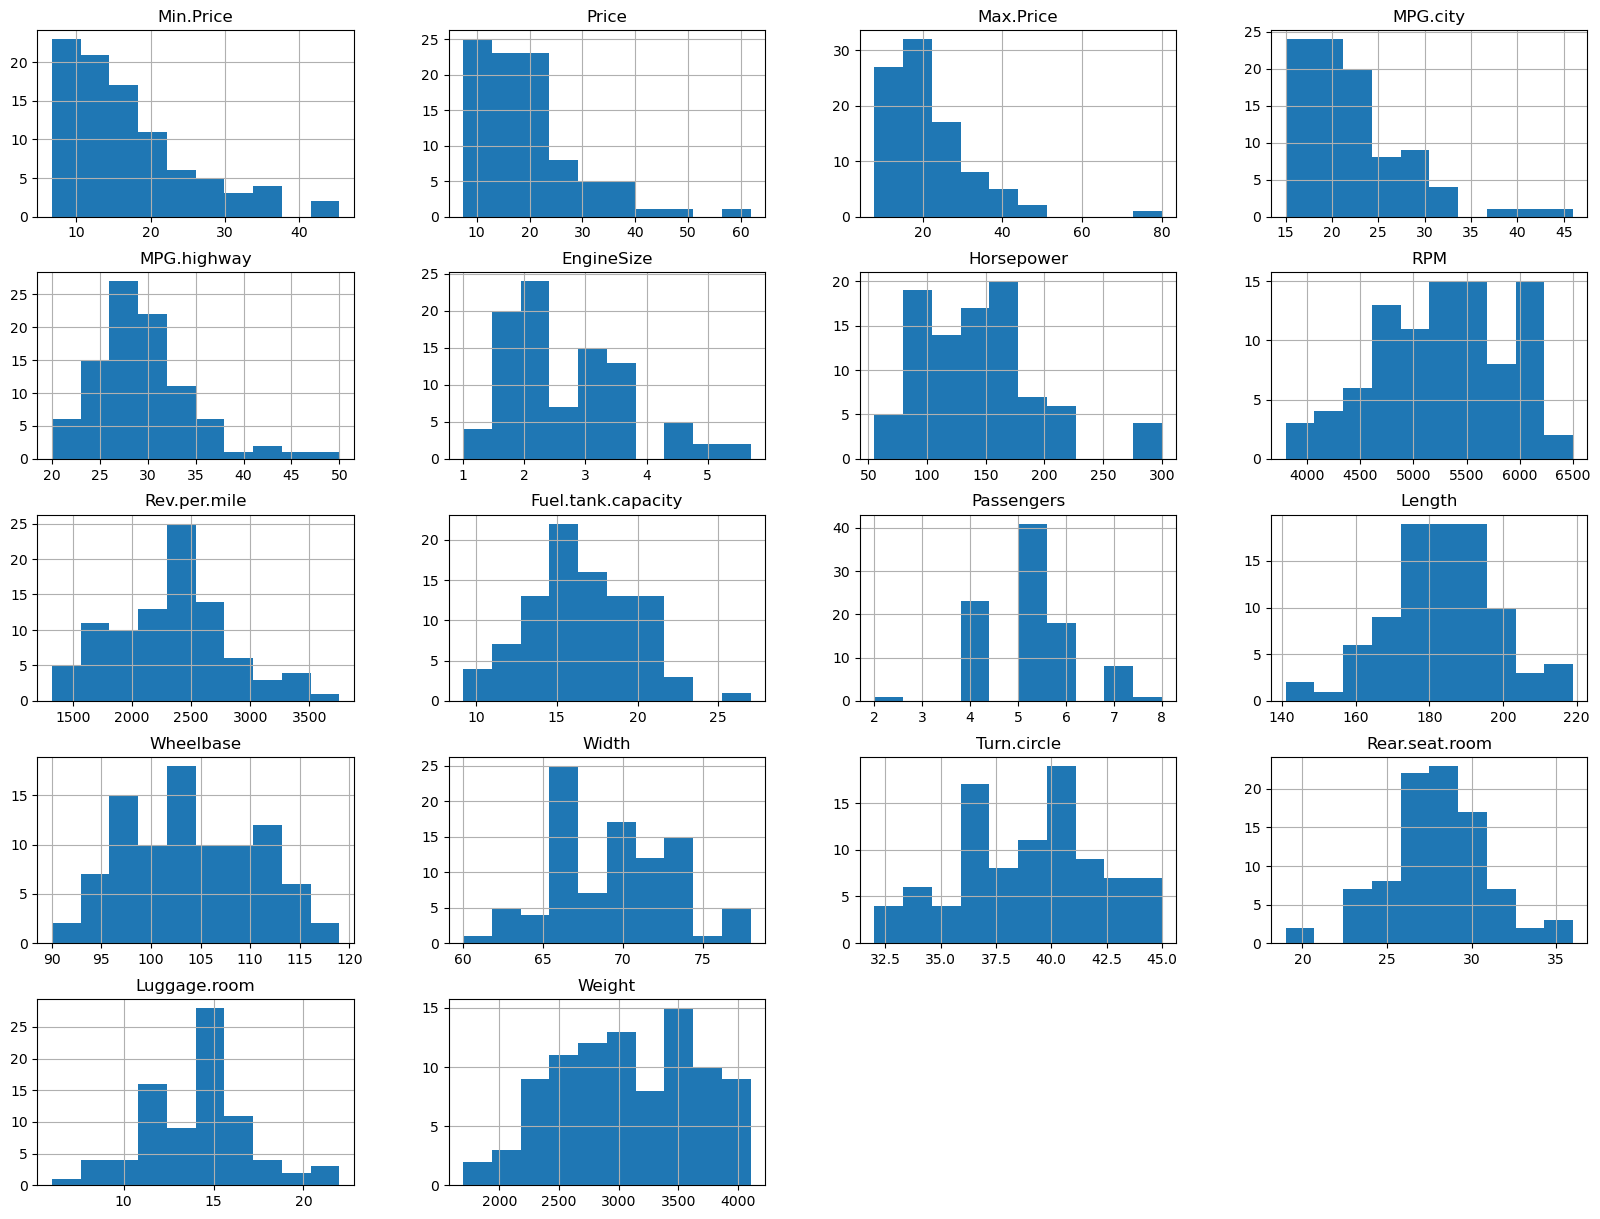

In [8]:
df_train.select_dtypes(include=np.number).hist(figsize=(20,15));

In [9]:
df_train.shape, y.shape

((92, 27), (92,))

### Changed from categoric to numeric
- Did not want dummies because was only Yes/No

In [10]:
df_train['Man.trans.avail'] = df_train['Man.trans.avail'].replace(['Yes'], '1')
df_train['Man.trans.avail'] = df_train['Man.trans.avail'].replace(['No'], '0')

C:\Users\kendr\AppData\Local\Temp\ipykernel_25352\1352075931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Man.trans.avail'] = df_train['Man.trans.avail'].replace(['Yes'], '1')
C:\Users\kendr\AppData\Local\Temp\ipykernel_25352\1352075931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Man.trans.avail'] = df_train['Man.trans.avail'].replace(['No'], '0')


In [11]:
df_train['Cylinders'] = pd.to_numeric(df_train['Cylinders'])
df_train['Man.trans.avail'] = pd.to_numeric(df_train['Man.trans.avail'])

C:\Users\kendr\AppData\Local\Temp\ipykernel_25352\2512584183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cylinders'] = pd.to_numeric(df_train['Cylinders'])
C:\Users\kendr\AppData\Local\Temp\ipykernel_25352\2512584183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Man.trans.avail'] = pd.to_numeric(df_train['Man.trans.avail'])


Get Dummies for Catergorial Data

In [12]:
X_dummy = pd.get_dummies(df_train, columns=['Manufacturer'], drop_first=True)
X_dummy = pd.get_dummies(X_dummy, columns=['Model'], drop_first=True)
X_dummy = pd.get_dummies(X_dummy, columns=['Type'], drop_first=True)
X_dummy = pd.get_dummies(X_dummy, columns=['AirBags'], drop_first=True)
X_dummy = pd.get_dummies(X_dummy, columns=['DriveTrain'], drop_first=True)
# X_dummy = pd.get_dummies(X_dummy, columns=['Cylinders'], drop_first=True)
#X_dummy = pd.get_dummies(X_dummy, columns=['Man.trans.avail'], drop_first=True)
X_dummy = pd.get_dummies(X_dummy, columns=['Origin'], drop_first=True)
X_dummy = pd.get_dummies(X_dummy, columns=['Make'], drop_first=True)


Set Parameters for algorithm  
- n_estimators : The number of boosting stages: default == 100
- max_depth : limits the number of nodes in the tree
- min_sample_split : the minimum number of samples required to split an internal node
- learning_rate : how much the contribution of each tree will shrink
- loss : loss function to optimize.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html


In [13]:
params = {
    "n_estimators": 1000,
    "max_depth": 4,
    "min_samples_split": 10,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

Check for nulls

In [14]:
X_dummy.isna().sum()


Min.Price                         0
Price                             0
Max.Price                         0
MPG.city                          0
MPG.highway                       0
Cylinders                         0
EngineSize                        0
Horsepower                        0
RPM                               0
Rev.per.mile                      0
Man.trans.avail                   0
Fuel.tank.capacity                0
Passengers                        0
Length                            0
Wheelbase                         0
Width                             0
Turn.circle                       0
Rear.seat.room                    1
Luggage.room                     10
Weight                            0
Manufacturer_Audi                 0
Manufacturer_BMW                  0
Manufacturer_Buick                0
Manufacturer_Cadillac             0
Manufacturer_Chevrolet            0
Manufacturer_Chrylser             0
Manufacturer_Chrysler             0
Manufacturer_Dodge          

In [15]:
X_dummy.dropna();

In [16]:
X = X_dummy.drop(columns=['Luggage.room', 'Rear.seat.room'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [18]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse_xgboost = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_xgboost))

The mean squared error (MSE) on test set: 0.8614


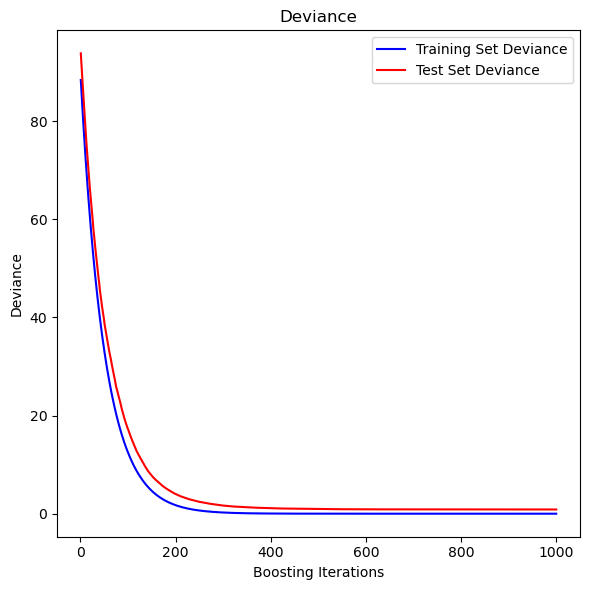

In [19]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

Plot Feature Importance
- Sorted the features and took the top 10

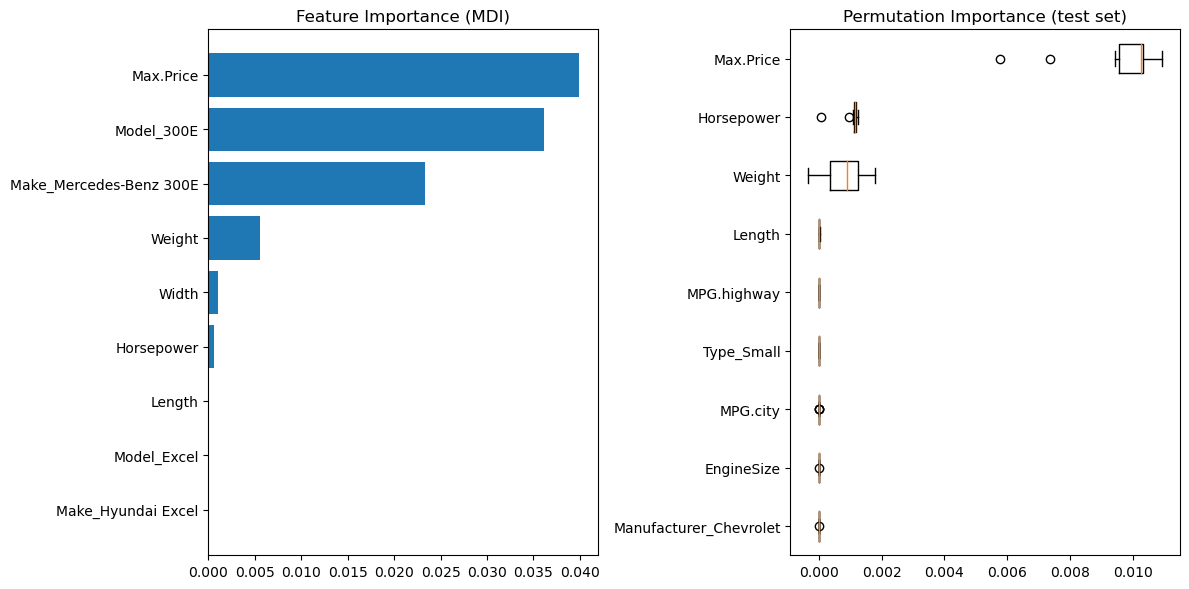

In [20]:
feature_names = (X_test.columns)
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[~10:]
sorted_idx = sorted_idx[:~1]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
sorted_idx = sorted_idx[~10:]
sorted_idx = sorted_idx[:~1]
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T ,
    vert=False,
    labels=np.array(feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Linear Regression


In [21]:
y_linear = df['Price']
X_linear = df[['Cylinders', 'Horsepower']]


X_linear['Cylinders'] = pd.to_numeric(X_linear['Cylinders'])
X_linear.head()

C:\Users\kendr\AppData\Local\Temp\ipykernel_25352\2971462626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_linear['Cylinders'] = pd.to_numeric(X_linear['Cylinders'])


,Cylinders,Horsepower
0,4,140
1,6,200
2,6,172
3,6,172
4,4,208


In [22]:
X_linear.dropna();

Simple Scatterplot Price by Horsepower, grouped by Cylinders

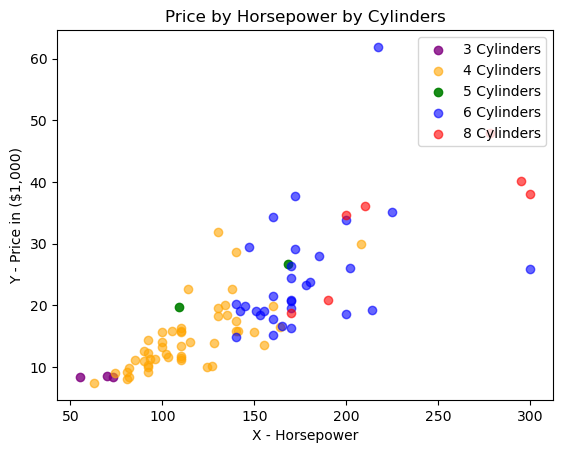

In [23]:
palette =['purple', 'orange', 'green', 'blue', 'red']
ind1 = X_linear['Cylinders'] == 3
ind2 = X_linear['Cylinders'] == 4
ind3 = X_linear['Cylinders'] == 5
ind4 = X_linear['Cylinders'] == 6
ind5 = X_linear['Cylinders'] == 8
plt.scatter(X_linear['Horsepower'][ind1], y[ind1], color=palette[0], label='3 Cylinders', alpha=0.8)
plt.scatter(X_linear['Horsepower'][ind2], y[ind2], color=palette[1], label='4 Cylinders', alpha=0.6)
plt.scatter(X_linear['Horsepower'][ind3], y[ind3], color=palette[2], label='5 Cylinders', alpha=0.9)
plt.scatter(X_linear['Horsepower'][ind4], y[ind4], color=palette[3], label='6 Cylinders', alpha=0.6)
plt.scatter(X_linear['Horsepower'][ind5], y[ind5], color=palette[4], label='8 Cylinders', alpha=0.6)
plt.xlabel("X - Horsepower")
plt.ylabel("Y - Price in ($1,000)")
plt.title("Price by Horsepower by Cylinders")
plt.legend(loc='upper right')

In [24]:
X_linear.columns

Index(['Cylinders', 'Horsepower'], dtype='object')

### Train_Test_Split

In [25]:
results = train_test_split(X_linear, y, random_state=42, test_size=0.333 )
X_linear_train, X_linear_test, y_linear_train, y_linear_test = results


### Fit/Score Model

In [26]:
model = LinearRegression()
model.fit(X_linear_train, y_linear_train)
print(model.score(X_linear_train, y_linear_train))
print(model.score(X_linear_test, y_linear_test))

0.5278576098845948
0.8123984883846849


### Model Evaluation Metrics
- R2
- Mean Absolute Error
- Mean Squared Error (MSE)  

In [27]:
r2_linear = r2_score(y_linear_test, model.predict(X_linear_test))
mae_linear = mean_absolute_error(y_linear_test, model.predict(X_linear_test))
mse_linear = mean_squared_error(y_linear_test, model.predict(X_linear_test))
print("The R2 on test set: {:.4f}".format(r2_linear))
print("The Mean Absolute Error on test set: {:.4f}".format(mae_linear))
print("The Mean Squared Error on test set: {:.4f}".format(mse_linear))


The R2 on test set: 0.8124
The Mean Absolute Error on test set: 3.0380
The Mean Squared Error on test set: 14.3781


In [28]:
yhat = model.predict(X_linear)

In [29]:
results = pd.concat([pd.DataFrame(y), X_linear, pd.DataFrame(yhat)], axis=1)
results.columns = ['Price', 'Cylinders', 'Horsepower','Yhat']
results.head(5)

,Price,Cylinders,Horsepower,Yhat
0,15.9,4.0,140.0,19.337838
1,33.9,6.0,200.0,28.581157
2,29.1,6.0,172.0,24.627303
3,37.7,6.0,172.0,24.627303
4,30.0,4.0,208.0,28.940055


In [30]:
results['Residual'] = results['Price'] - results['Yhat']
results.head(5)

,Price,Cylinders,Horsepower,Yhat,Residual
0,15.9,4.0,140.0,19.337838,-3.437838
1,33.9,6.0,200.0,28.581157,5.318843
2,29.1,6.0,172.0,24.627303,4.472697
3,37.7,6.0,172.0,24.627303,13.072697
4,30.0,4.0,208.0,28.940055,1.059945


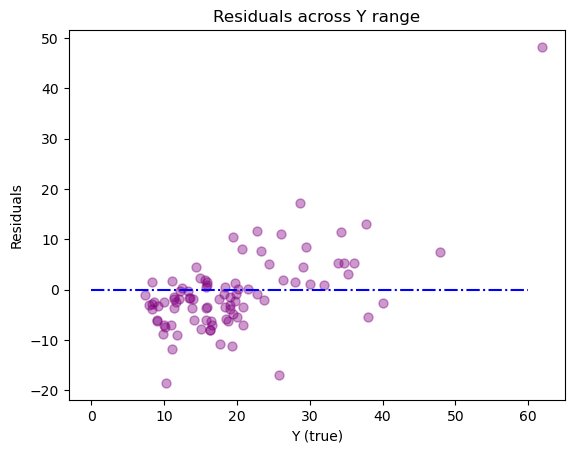

In [31]:
plt.scatter(results['Price'], results['Residual'], alpha=0.4, s= 42, c='purple');
plt.ylabel('Residuals')
plt.xlabel('Y (true)')
plt.title('Residuals across Y range')
plt.plot([0,60],[0,0], linestyle='dashdot', color='blue', markersize=2);

In [32]:
y_mean=y.mean()

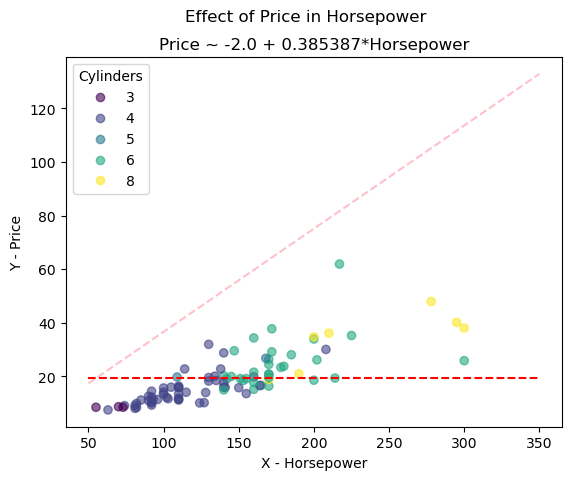

In [33]:
scatter = plt.scatter(X_linear['Horsepower'],y, alpha=0.6, c=X_linear['Cylinders'])
plt.xlabel("X - Horsepower")
plt.ylabel("Y - Price")
handles, label = scatter.legend_elements(prop="colors", alpha=0.6)

B0 = model.intercept_
B1 = model.coef_[0]

x0, x1 = 50, 350
y0, y1 = (B0 + B1*x0), (B0 + B1*x1)
plt.plot([x0, x1], [y0, y1], linestyle='--', color='pink');
plt.plot([x0, x1], [y_mean, y_mean], linestyle='--', color='red');
plt.title(f"Price ~ {np.round(B0,1)} + {np.round(B1,6)}*Horsepower")
plt.suptitle("Effect of Price in Horsepower");
plt.legend(handles, label, loc='upper left', title="Cylinders")
plt.show()

### Ridge Regression

class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [34]:
from sklearn.linear_model import Ridge

In [35]:
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_test, y_test)

0.9999953527735419

### Using the Permutation feature importance
- R2
- neg_mean_absolute_percentage_error
- neg_mean_squared_error

In [36]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    model, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    Max.Price0.265 +/- 0.049
    Price   0.240 +/- 0.038
    Min.Price0.202 +/- 0.027
    Wheelbase0.000 +/- 0.000
    Weight  0.000 +/- 0.000
    EngineSize0.000 +/- 0.000
    Width   0.000 +/- 0.000
    RPM     0.000 +/- 0.000
    Manufacturer_Pontiac0.000 +/- 0.000
    Manufacturer_Eagle0.000 +/- 0.000
neg_mean_absolute_percentage_error
    Max.Price0.222 +/- 0.032
    Price   0.206 +/- 0.027
    Min.Price0.186 +/- 0.022
    Wheelbase0.000 +/- 0.000
    Weight  0.000 +/- 0.000
    EngineSize0.000 +/- 0.000
    Width   0.000 +/- 0.000
    RPM     0.000 +/- 0.000
    Man.trans.avail0.000 +/- 0.000
    Manufacturer_Honda0.000 +/- 0.000
    Manufacturer_Pontiac0.000 +/- 0.000
neg_mean_squared_error
    Max.Price24.379 +/- 4.552
    Price   22.072 +/- 3.496
    Min.Price18.647 +/- 2.529
    Wheelbase0.000 +/- 0.000
    Weight  0.000 +/- 0.000
    EngineSize0.000 +/- 0.000
    Width   0.000 +/- 0.000
    RPM     0.000 +/- 0.000
    Manufacturer_Pontiac0.000 +/- 0.000
    Manufacturer_E

In [37]:
print(f'The MSE using XGBoost was : {mse_xgboost}')
print(f'The MSE using Linear Regression was: {mse_linear}')

The MSE using XGBoost was : 0.8614465932216362
The MSE using Linear Regression was: 14.378103906919177
